In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import integrate
from scipy import interpolate

In [2]:
#path = "/Users/argelia/Documents/Trabajo/TrabajoNestor/Data/Blok_McGaugh_Rubin_2001/"
#data = np.loadtxt(path+"ESO3020120.dat")
path="/Users/namh2/OneDrive/Documentos/DOCTORADO/AJUSTES Y ERRORES LANE-EMDEN/Blok_McGaugh_Rubin_2001/"
data=np.loadtxt(path+"ESO3020120.dat")

In [3]:
RCr_data = np.array([row[1] for row in data])# galactocentric distance [kpc]
RCv_data = np.array([row[5] for row in data])# rotation velocity [km/s]
RCev_data = np.array([row[6] for row in data])# error in rotation velocity [km/s]

Text(0.5, 0, 'r[kpc]')

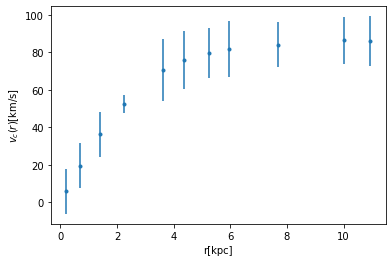

In [4]:
plt.errorbar(RCr_data,RCv_data,yerr=RCev_data,fmt='.')
plt.ylabel(r'$v_{c}(r)$[km/s]')
plt.xlabel("r[kpc]")

In [5]:
def Integrate(func,x0,y0,x,h):
    def RK4(func,x0,y0,h):
        K0 = h*func(x0,y0)
        K1 = h*func(x0 + 0.5*h, y0 + 0.5*K0)
        K2 = h*func(x0 + 0.5*h, y0 + 0.5*K1)
        K3 = h*func(x0 + h, y0 + K2)
        return (K0 + 2.*K1 + 2.*K2 + K3)/6.
    X = []
    Y = []
    X.append(x0)
    Y.append(y0)
    #while x0 < x:
    while y0[0] < 2.500000000000:
    #while y0[0]>0.99:
        y0 = y0 + RK4(func,x0,y0,h) #update next value of y
        x0 = x0 + h #update next value of x
        X.append(x0)
        Y.append(y0)
    return np.array(X),np.array(Y)

Differential Equations with equation of state 


$$\begin{equation} m'=4\pi r^2\rho \qquad P'=-\frac{Gm\rho}{r^2} \qquad P=K\rho \qquad
 m'=4\pi\left(2.5188027\times10^{-3}\right)\frac{P}{K} \qquad P'=-\left(0.499246\times10^{-6}\right)\frac{m}{r^2}\frac{P}{K}
\end{equation}$$

In [6]:
def rhs(x,y):
    dy=np.zeros(2)
    dy[0]=4*np.pi*Gm*x**2*(y[1]/K)
    dy[1]=-Gp*y[0]/x**2*(y[1]/K)
    return dy

In [7]:
def model(data,v,X): #modelo, aqui solo da unidades e interpola 
    V = []
    x=X
    RC=v*np.sqrt(G)
    Int_l = interpolate.interp1d(x,RC)  
    for i in range(len(data)):
        if data[i] < x[-1]:
            v=Int_l(data[i])
            V.append(v)
        else:
            v=0.
            #v=np.sqrt(G*Y[:,0][-1]/(data[i]))
            V.append(v)
    return V,RC 

In [8]:
def Xi2(RCv_data,RCv_teo,RCev_data): #calcula el X²
    xi=np.sum((RCv_data-RCv_teo)**2./(RCev_data)**2.)
    return xi

In [9]:
Gm=2.5188027*10**(-3) #constantes a usar 
Gp=0.499246*10**(-6)
G=4.258*10**(4)
Gv=1.24*10**(5)
y0=np.zeros(2)
h=0.001
x0=0.00001
C_rate=32.444*10**(3)

In [17]:
K_min=0.9*10**(-8)
K_max=5.*10**(-8)
Kvec=np.linspace(K_min,K_max,10)
p_0min=4.9*10**(-8)
p_0max=9.1*10**(-8)
p_0=np.linspace(p_0min,p_0max,10)

In [18]:
y0[0]=0. #condiciones iniciales
y0[1]=p_0[0]
K=K_min

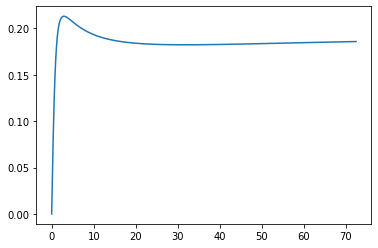

In [19]:
X,Y=Integrate(rhs,x0,y0,10.,h) #checar el tiempo de integración
v=np.sqrt(Y[:,0]/X)
plt.plot(X,v)

Text(0.5, 0, 'R[kpc]')

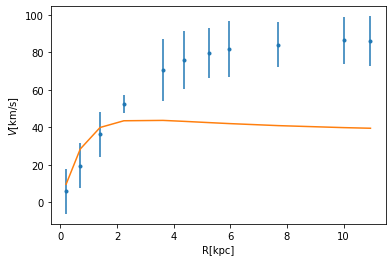

In [20]:
V,RC=model(RCr_data,v,X) #checar que toma todos los puntos
plt.errorbar(RCr_data,RCv_data,yerr=RCev_data,fmt='.')
plt.plot(RCr_data,V)
plt.ylabel(r'$V$[km/s]')
plt.xlabel("R[kpc]")

Condición 

$\frac{\sigma}{m}v\rho t_{age}\approx 1 \qquad v=\sqrt{K}c$

$(2\frac{cm^2}{g})\sqrt{K}(3\times10^{10}\frac{cm}{s})(\rho\frac{GeV}{cm^3})(3.1536\times10^{17}s)(\frac{1.989\times10^{33}g}{1M_{\odot}})(\frac{1M_{\odot}}{1.16\times10^{57}GeV})=$

$(2)(3)\frac{(3.1536)(1.989)}{1.16}\times10^{10+17+33-57}\sqrt{K}\tilde{\rho}=32.444\times10^{3}\sqrt{K}\tilde{\rho}=32.444\times10^3\sqrt{k}\frac{P}{K}$

$rate=C_{rate}\sqrt{K}\frac{P}{K}$

Si se cumple se debe guardar el radio $r_1$ y debemos considerar la densidad como sigue

$\rho(r) = 
  \left \{
    \begin{aligned}
      P/K &,\ \text{si} \ r < r_1 \\
      \rho_s(r/r_s)^{-1}(1+r/r_s)^{-2} &,\ \text{si} \ r > r_1
    \end{aligned}
  \right .$

$r_s=-r\frac{\rho'r_1+3\rho}{\rho'r_1+\rho}$

$\rho_s=-4(\rho'r_1+\rho)(\frac{\rho}{\rho'r_1+3\rho})^3$

donde los valores de $\rho->\rho(r_1)$ y $\rho'->\rho'(r_1)$ se encuentran al evaluar el valor de $r_1$

In [27]:
%%time 
#calcula el valor minimo de P y K, minimo X²
xi_minimo=10000
xi = np.zeros((len(p_0),len(Kvec))) ##len(sigma))
for l in range(0,len(Kvec)):
    K=Kvec[l]
    for i in range(0,len(p_0)):
        x0=0.00001
        y0[0]=0.
        y0[1]=p_0[i]
        X,Y=Integrate(rhs,x0,y0,10.,h) #aquí ya se integraron las ecuaciones \rho=P/K
        r_1=1000000
        rate=C_rate*Y[:,1]/np.sqrt(K)
        rho_prima=-Gp*(Y[:,0]*(Y[:,1]/K))/(K*(X**2))
        for j in range (0,len(rate)):
            if (rate[j]>=1.0): # AQUI ES LA CONDICION DE QUE rate=1 y guarda el indice para buscar la densidad
                r_1=X[j]
                indr_1=j
        rho_1=Y[indr_1,1]/K #densidad que corresponde al r1
        rhop_1=rho_prima[indr_1]#es la derivada de la densidad para sustituir en r_s y rho_s
        rho_s=-4.*(rhop_1*r_1+rho_1)*(rho_1/(rhop_1*r_1+3.*rho_1))**(3.0) 
        r_s=-r_1*(rhop_1*r_1+3.*rho_1)/(rhop_1*r_1+rho_1)
        m_nfw=4.0*np.pi*(25.1880*10**(-4))*r_s**(3.0)*rho_s*(np.log((1.0+X/r_s)/(1.0+r_1/r_s))+(r_1/r_s-X/r_s)/((1.0+X/r_s)*(1.0+r_1/r_s)))
        k=0
        v_m=np.zeros(len(X))
        for k in range(0,len(X)):
            if (k<indr_1):
                v_m[k]=np.sqrt(Y[k,0]/X[k])
            else :
                v_m[k]=np.sqrt((m_nfw[k]+Y[indr_1,0])/X[k])
        V,RC=model(RCr_data,v_m,X)
        xi[i,l]=Xi2(RCv_data,V,RCev_data)
        if (xi[i,l] < xi_minimo):
            xi_minimo=xi[i,l]
            p0_minimo=p_0[i]
            K_minimo=Kvec[l]

Wall time: 1min 9s


In [29]:
rho_minimo=p0_minimo/K_minimo
print(xi_minimo)
print(K_minimo)
print(rho_minimo)

0.1864223811463283
3.6333333333333334e-08
1.7339449541284402


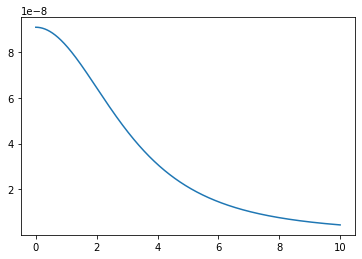

In [30]:
plt.plot(X,Y[:,1]) #checamos la forma de radio vs presión

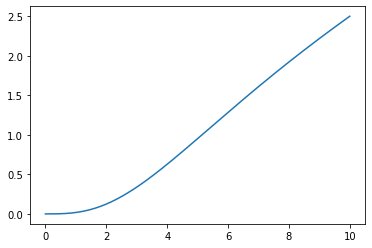

In [31]:
plt.plot(X,Y[:,0]) #checamos la forma de radio vs masa

In [32]:
y0[0]=0. #condiciones iniciales
y0[1]=p0_minimo
K=K_minimo 
X,Y=Integrate(rhs,x0,y0,10.,h)

Differential equations for $\rho$
$$ \rho'=-\frac{Gm\rho}{Kr^2} \qquad \rho''=C\left(4\pi r^3\rho-\frac{Gm^2}{Kr}-2m\right)=0
$$

In [33]:
#aqui escribimos rho' y rho'' y la CONDICION rate,
rho_prima=-Gp*(Y[:,0]*(Y[:,1]/K_minimo))/(K_minimo*(X**2))  #calculamos la derivada rho'
rho_biprima=4*np.pi*X*X*(Y[:,1]/K_minimo)-((G*Y[:,0]*Y[:,0])/(K_minimo*X))-2*Y[:,0] #segunda derivada rho''
rate=C_rate*Y[:,1]/np.sqrt(K_minimo)
print(rate)

[10.7231485  10.72314681 10.72314272 ...  0.15959724  0.15956891
  0.15954059]


In [34]:
r_1=100000 
for i in range (0,len(rate)):
    if (rate[i]>=1.0): # AQUI ES LA CONDICION DE QUE rate=1 y guarda el indice para buscar la densidad
        r_1=X[i]
        indr_1=i
rho_1=Y[indr_1,1]/K_minimo #densidad que corresponde al r1
rhop_1=rho_prima[indr_1]#es la derivada de la densidad para sustituir en r_s y rho_s
rho_s=-4.*(rhop_1*r_1+rho_1)*(rho_1/(rhop_1*r_1+3.*rho_1))**(3.0) 
r_s=-r_1*(rhop_1*r_1+3.*rho_1)/(rhop_1*r_1+rho_1)
print(r_1)
print(rho_1)
print(rhop_1)
print(r_s)

6.639010000000552
0.16170727150471506
-0.05756779879347427
3.0992643607770667


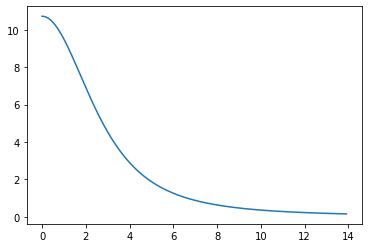

In [35]:
plt.plot(X,rate) #grafica de rate, donde se comprueba que cuando rate=1 obtenemos el r1

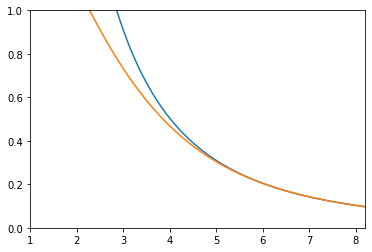

In [36]:
#AQUI COMPROBAMOS LAS DENSIDADES "ver que pegan en r1"
rho_nfw=rho_s*(X/r_s)**(-1.0)*(1+X/r_s)**(-2.0) 
plt.plot(X,rho_nfw)
plt.plot(X,Y[:,1]/K_minimo)
plt.xlim([1.,8.2])
plt.ylim([0,1.0002])
plt.show()

$\rho'_{NFW}=-\frac{\rho_s}{r_s}(r/r_s)^{-2}(1+r/r_s)^{-3}(1+3r/r_s)$

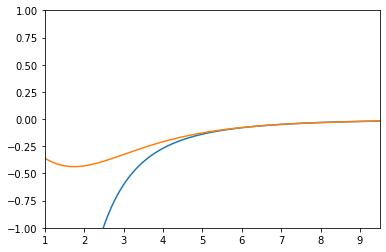

In [37]:
#ahora checamos que pegue las derivadas de la densidad (valores muy grandes)
rhop_nfw=-(rho_s/r_s)*((X/r_s)**(-2.0))*((1.0+X/r_s)**(-3.0))*(1.0+(3.0*X)/r_s)
rho_prima=-Gp*(Y[:,0]*(Y[:,1]/K_minimo))/(K_minimo*(X**2))
plt.plot(X,(rhop_nfw))
plt.plot(X,(rho_prima))
plt.xlim([1.,9.5])
#plt.ylim([-.5*10**(9),.1*10**(9)])
plt.ylim([-1,1])
plt.show()

$M=4\pi r_s^{3}\rho_s((\ln(\frac{1+R/r_s}{1+r_1/r_s}))+\frac{r_1/r_s-R/r_s}{(1+R/r_s)(1+r_1/r_s)})$

$M=4\pi(25.1880\times10^{-4}) r_s^{3}\rho_s((\ln(1+R/r_s)-\frac{R/r_s}{1+R/r_s})$

[-1.49254331 -1.49254314 -1.49254263 ...  1.3587876   1.35894253
  1.35909746]


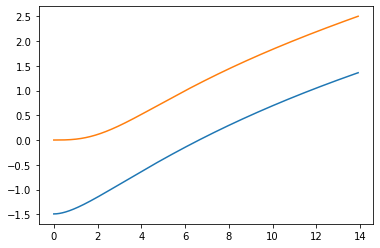

In [38]:
#es la masa al integrar la densidad de r1 a R
m_nfw=4.0*np.pi*(25.1880*10**(-4))*r_s**(3.0)*rho_s*(np.log((1.0+X/r_s)/(1.0+r_1/r_s))+(r_1/r_s-X/r_s)/((1.0+X/r_s)*(1.0+r_1/r_s)))
M_nfw=4.0*np.pi*(25.1880*10**(-4))*r_s**(3.0)*rho_s*(np.log(1+X/r_s)-(X/r_s)/(1+(X/r_s)))
plt.plot(X,m_nfw)
plt.plot(X,Y[:,0])
print(m_nfw)
plt.show()

C:\Users\namh2\AppData\Local\Temp/ipykernel_7052/3646143653.py:2: RuntimeWarning: invalid value encountered in sqrt
  v_nfw=np.sqrt(m_nfw/X)


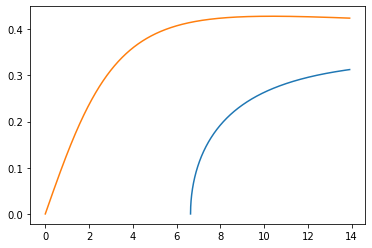

In [39]:
#aqui se muestran las velocidades
v_nfw=np.sqrt(m_nfw/X)
v_c=np.sqrt(Y[:,0]/X)
plt.plot(X,v_nfw)
plt.plot(X,v_c)
#print(v_nfw)
plt.show()

C:\Users\namh2\AppData\Local\Temp/ipykernel_7052/460132872.py:14: RuntimeWarning: invalid value encountered in sqrt
  v1=np.sqrt((m_nfw+Y[indr_1,0])/X)


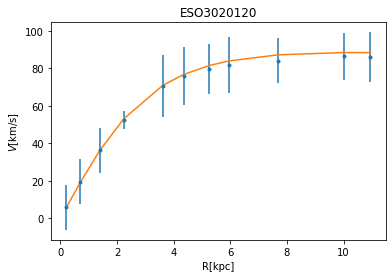

In [41]:
#intento pegar las velocidades.
y0[0]=0.
y0[1]=p0_minimo
K=K_minimo
X,Y=Integrate(rhs,x0,y0,10.,h)
v_m=np.zeros(len(X))
l=0
for l in range(0,len(X)):
    if (l<indr_1):
        v_m[l]=np.sqrt(Y[l,0]/X[l])
    else :
        v_m[l]=np.sqrt((m_nfw[l]+Y[indr_1,0])/X[l])
v=np.sqrt(Y[:,0]/X)
v1=np.sqrt((m_nfw+Y[indr_1,0])/X)
V1,RC1=model(RCr_data,v1,X)
V,RC=model(RCr_data,v,X)
V_m,RC_m=model(RCr_data,v_m,X)
plt.errorbar(RCr_data,RCv_data,yerr=RCev_data,fmt='.')
#plt.plot(RCr_data,V)
#plt.plot(RCr_data,V1)
plt.plot(RCr_data,V_m)
plt.ylabel(r'$V$[km/s]')
plt.xlabel("R[kpc]")
plt.title("ESO3020120")
plt.show()
#plt.savefig("RCESO3020120.pdf")

## Calculos del core

-0.4375223358987775 -0.0


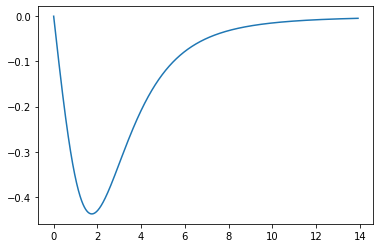

In [42]:
plt.plot(X,rho_prima) # esto es para el core
minimo=np.min(rho_prima) # calculamos el minimo de rho_prima
maximo=np.max(rho_prima) #calculamos el maximo de rho_biprima
print(minimo,maximo)

In [43]:
rho_c=100000
r_c=100000  # buscamos el valor de X que corresponde al rho' minimo que hace que rho''= 0 punto de inflexión de rho
for i in range (0,len(rho_prima)):
    if (rho_prima[i]<=rho_c):
        rho_c=rho_prima[i]
        r_c=X[i]
print(rho_c)
print(r_c)

-0.4375223358987775
1.743009999999919


Equations
$$\begin{equation}
       T=\frac{Km}{k_B} \qquad  \langle v^{2}\rangle=\frac{3k_BT}{m} \qquad \langle v \rangle =\sqrt{\frac{8k_BT}{\pi m}}
\end{equation}$$

In [44]:
k_B=8.617333262*10**(-5) # constante de Boltzmann
m=1.00*10**(6)  # masa de la particula 1GeV
T=(K_minimo*m)/(k_B) 
print(T)

421.63082509008956


In [45]:
v2=3*k_B*T/m
print(np.log(v2))

-16.03191795471727


In [46]:
v_cr=np.sqrt(8*k_B*T/(np.pi*m))
print(v_cr)

0.0003041744130989464


## Calcular las regiones de confianza

In [47]:
xi2=np.zeros((len(p_0),len(Kvec)))
for i in range(0,len(p_0)):
    for j in range (0,len(Kvec)):
        xi2_minimo=10000
        if (xi[i,j] < xi2_minimo):
            xi2_minimo=xi[i,j]
            xi2[i,j]=xi[i,j]

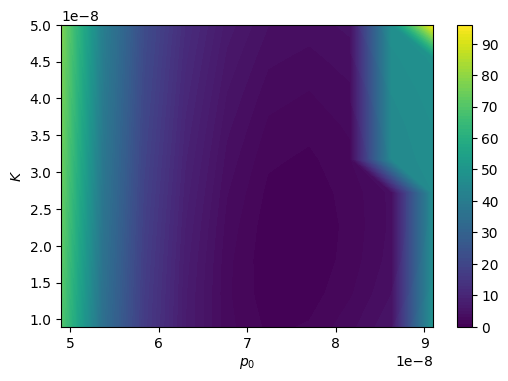

In [48]:
x,y = np.meshgrid(p_0,Kvec)
fig = plt.figure(dpi=100)
plt.contourf(x,y,xi2,100,cmap='viridis')
plt.xlabel(r'$p_0$')
plt.ylabel(r'$K$')
plt.colorbar();

In [49]:
xicl = np.zeros((len(p_0),len(Kvec)))
diffxi2=np.zeros((len(p_0),len(Kvec)))
for l in range(0,len(p_0)):
    for j in range(0,len(Kvec)):
        diffxi2[l,j]=xi2[l,j]-xi_minimo
        if ((diffxi2[l,j] )<=4.61):
            xicl[l,j]=diffxi2[l,j]

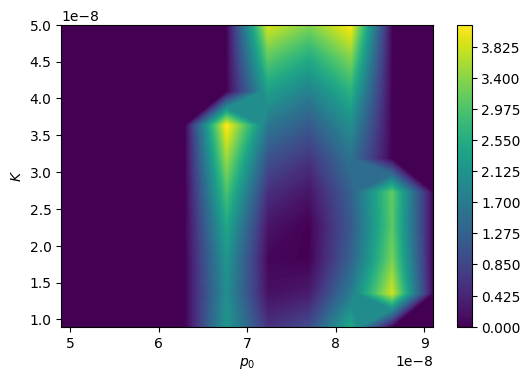

In [50]:
x,y = np.meshgrid(p_0,Kvec)
fig = plt.figure(dpi=100)
plt.contourf(x,y,xicl,200,cmap='viridis')
plt.xlabel(r'$p_0$')
plt.ylabel(r'$K$')
plt.colorbar();

In [51]:
long=1000000
r=np.zeros(long)
kapa=np.zeros(long)
dx=np.zeros(long)
c=0
for i in range(0,len(p_0)):
    for j in range(0,len(Kvec)):
        r[c]=p_0[i]/Kvec[j]
        kapa[c]=Kvec[j]
        dx[c]=xicl[i,j]
        c=c+1       

In [52]:
print(c)
vec1=np.zeros(c)
vec2=np.zeros(c)
vec3=np.zeros(c)
for i in range(0,len(vec1)):
    if (dx[i]!=0.0):
        vec1[i]=r[i]
        vec2[i]=kapa[i]
        vec3[i]=dx[i]

100


In [53]:
np.savetxt("xi2ESO3020120particion.txt",np.transpose([vec1,vec2,vec3]))